# Checking correctness of CDM halo mass function at  http://hmf.icrar.org/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

- Using their Web interface

Define specific cosmological parameters used for P(k) and HMF calculation

In [2]:
Omega_m = 0.2725
Omega_L = 1 - Omega_m
Omega_b = 0.0455
Omega_dm = Omega_m - Omega_b
h = 0.702
sigma8 = 0.8
z = 0
delta_c = 1.686
n_s = 0.967
#delta_crit = 200 # how to define the halo mass; where $\bar\rho = \delta_{crit} \times \rho_{crit}$ 
method = 'Press-Schechter74' # http://adsabs.harvard.edu/abs/1974ApJ...187..425P
transfer_calculator = 'CAMB' # Use CAMB to calculate P(k) and T(k)
rho_crit = 277.5*10**9 # h^2 M/Mpc^3
rho_0 = rho_crit*Omega_m
#print(Omega_L, Omega_dm)

Import and plot P(k)

In [3]:
kVector = 'kVector_CDM-Benson .txt'
kV_data = pd.read_csv(kVector, sep=" ", header=None, skiprows=4)
kV_data.columns = ['k, h/Mpc', 'P(k), (Mpc/h)^3', 'T(k), (Mpc/h)^3', 'Delta_k']
kV_data.head()

,"k, h/Mpc","P(k), (Mpc/h)^3","T(k), (Mpc/h)^3",Delta_k
0,3.059023e-07,1.948885,39449.890352,2.826212e-21
1,3.215863e-07,2.045428,39449.883963,3.446251e-21
2,3.380743e-07,2.146754,39449.877574,4.202320e-21
3,3.554078e-07,2.253099,39449.871184,5.124261e-21
4,3.736299e-07,2.364712,39449.864795,6.248467e-21


Import and plot dn/dln(M200)

In [4]:
mVector = 'mVector_CDM-Benson .txt'
mV_data = pd.read_csv(mVector, sep=" ", header=None, skiprows=12)
mV_data.columns = ['M200, M/h', 
                   'sigma', 
                   'ln(1/sigma)', 
                   'n_eff', 
                   'f(sigma)', 
                   'dn/dm, h^4/(Mpc^3*M_sun)', 
                   'dn/dlnm, h^3/Mpc^3', 
                   'dn/dlog10m, h^3/Mpc^3', 
                   'n(>m), h^3/Mpc^3', 
                   'rho(>m), M_sun*h^2/Mpc^3', 
                   'rho(>m), M_sun*h^2/Mpc^3', 
                   'Lbox(N=1), Mpc/h']
mV_data.head()
#mV_data.info()

,"M200, M/h",sigma,ln(1/sigma),n_eff,f(sigma),"dn/dm, h^4/(Mpc^3*M_sun)","dn/dlnm, h^3/Mpc^3","dn/dlog10m, h^3/Mpc^3","n(>m), h^3/Mpc^3","rho(>m), M_sun*h^2/Mpc^3","rho(>m), M_sun*h^2/Mpc^3","Lbox(N=1), Mpc/h"
0,1.000000e+10,3.509867,-1.255578,-2.374675,0.341508,2.691831e-11,0.269183,0.619817,0.314188,4.771973e+10,2.790992e+10,1.470969
1,1.122018e+10,3.467859,-1.243537,-2.370249,0.344674,2.173296e-11,0.243848,0.561480,0.284655,4.740727e+10,2.822238e+10,1.520175
2,1.258925e+10,3.426059,-1.231410,-2.365764,0.347869,1.754718e-11,0.220906,0.508655,0.257902,4.708969e+10,2.853996e+10,1.571020
3,1.412538e+10,3.384466,-1.219196,-2.361152,0.351091,1.416963e-11,0.200151,0.460865,0.233664,4.676685e+10,2.886280e+10,1.623564
4,1.584893e+10,3.343081,-1.206893,-2.356441,0.354340,1.144327e-11,0.181364,0.417605,0.211702,4.643864e+10,2.919101e+10,1.677869


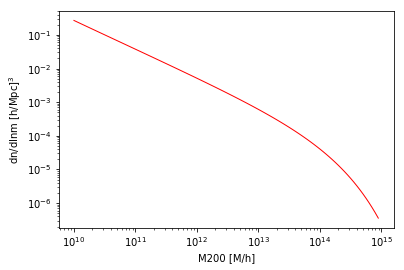

In [5]:
plt.plot(mV_data['M200, M/h'], mV_data['dn/dlnm, h^3/Mpc^3'], linewidth=1.0,color="r")
plt.loglog()
plt.xlabel('M200 [M/h]')
plt.ylabel('dn/dlnm [h/Mpc]$^3$')
#plt.title('P(k)')
#plt.savefig("P_k.png")
plt.show()

Compare P(k) with other example (Lovell16)

In [6]:
Pk_Lovell_file = '../calc/sf_CDM__k500-z127-matterpower.dat'
Pk_Lovell_data = pd.read_csv(Pk_Lovell_file, sep="   ", header=None, skiprows=0, index_col=False, engine='python')
Pk_Lovell_data.columns = ['k, h/Mpc', 'P(k), (Mpc/h)^3']
Pk_Lovell_data.head()

,"k, h/Mpc","P(k), (Mpc/h)^3"
0,0.000100,663.35
1,0.000102,676.22
2,0.000104,689.33
3,0.000106,702.70
4,0.000108,716.33


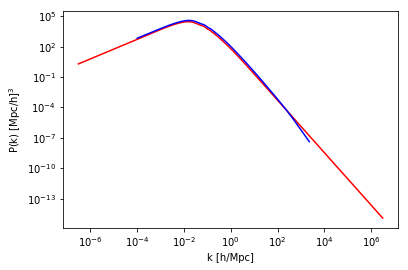

In [7]:
plt.plot(kV_data['k, h/Mpc'], kV_data['P(k), (Mpc/h)^3'], linewidth=1.5,color="r")
plt.plot(Pk_Lovell_data['k, h/Mpc'], Pk_Lovell_data['P(k), (Mpc/h)^3'], linewidth=1.5,color="b")
plt.loglog()
plt.xlabel('k [h/Mpc]')
plt.ylabel('P(k) [Mpc/h]$^3$')
#plt.xlim([0.01,0.02])
#plt.ylim([26000,28500])
#plt.title('P(k)')
#plt.savefig("P_k.png")
plt.show()

In [8]:
mean_Pk_HMFcalc = kV_data[(kV_data['k, h/Mpc'] > 0.01) & (kV_data['k, h/Mpc'] < 0.02)]['P(k), (Mpc/h)^3'].mean()
mean_Pk_Lovell = Pk_Lovell_data[(Pk_Lovell_data['k, h/Mpc'] > 0.01) & (Pk_Lovell_data['k, h/Mpc'] < 0.02)]['P(k), (Mpc/h)^3'].mean()
print(mean_Pk_HMFcalc, mean_Pk_Lovell)

27617.659777934434 36521.67647058824


So, our old P(k) for CDM obtained from M.Lovell was not very good (or maybe just calculated for another cosmology)

Comparing P(k) with Benson's CDM 

In [9]:
Pk_Benson_file = 'cdm_Benson_100dex_z0_matterpower.dat'
Pk_Benson_data = pd.read_csv(Pk_Benson_file, sep="   ", header=None, skiprows=0, index_col=False, engine='python')
Pk_Benson_data.columns = ['k, h/Mpc', 'P(k), (Mpc/h)^3']
Pk_Benson_data.head()

,"k, h/Mpc","P(k), (Mpc/h)^3"
0,0.000100,552.65
1,0.000102,563.37
2,0.000104,574.30
3,0.000106,585.43
4,0.000108,596.79


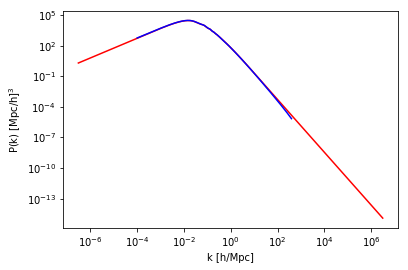

In [10]:
plt.plot(kV_data['k, h/Mpc'], kV_data['P(k), (Mpc/h)^3'], linewidth=1.5,color="r")
plt.plot(Pk_Benson_data['k, h/Mpc'], Pk_Benson_data['P(k), (Mpc/h)^3'], linewidth=1.5,color="b")
plt.loglog()
plt.xlabel('k [h/Mpc]')
plt.ylabel('P(k) [Mpc/h]$^3$')
#plt.xlim([0.01,0.02])
#plt.ylim([26000,28500])
#plt.title('P(k)')
#plt.savefig("P_k.png")
plt.show()

In [11]:
mean_Pk_Benson = Pk_Benson_data[(Pk_Benson_data['k, h/Mpc'] > 0.01) & (Pk_Benson_data['k, h/Mpc'] < 0.02)]['P(k), (Mpc/h)^3'].mean()
print(mean_Pk_HMFcalc, mean_Pk_Benson)

27617.659777934434 28265.382352941175


Agreement is much better!

Implementing Press-Schechter formalism

In [12]:
# top-hat window function
barrho = Omega_m * rho_crit
#print(barrho/10**9)
def Wth(k, M):
    R = (3*M/(4*np.pi*barrho))**(1./3.)
    x = k*R
    W = 3*(np.sin(x)-x*np.cos(x))/x**3
    return W

def sigma2th(M, Pk):
    sigma2 = 0
    #R = (3*M/(4*np.pi*barrho))**(1./3.)
    k0 = Pk['k, h/Mpc'].min()
    for i, item in Pk.iterrows():
        k = item['k, h/Mpc']
        P = item['P(k), (Mpc/h)^3']
        W = Wth(k, M)
        dk = k - k0
        dsigma2 = (1/(2*np.pi**2))*(k**2)*dk*P*W**2
        sigma2 += dsigma2
        k0 = k
        #print(k, P, W**2, dsigma2, sigma2)
    return sigma2

In [13]:
Mh = 10**14 # Msun/h
print(sigma2th(Mh, Pk_Benson_data), sigma2th(Mh, kV_data), sigma2th(Mh, Pk_Lovell_data))

0.785431865346 0.77098858879 1.2179609835


In [14]:
sigma_actual = mV_data[(mV_data['M200, M/h'] > Mh*0.95) & (mV_data['M200, M/h'] < Mh*1.05)]['sigma'].mean()
print(sigma_actual**2)

0.7904725650974324


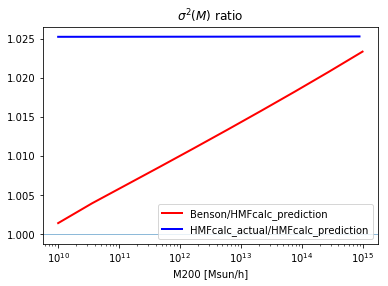

In [15]:
Mhalo = np.logspace(10, 15, 10)
plt.plot(Mhalo, (sigma2th(Mhalo, Pk_Benson_data)/sigma2th(Mhalo, kV_data)), 
         linewidth=2.0, 
         color="r", 
         label='Benson/HMFcalc_prediction')
plt.plot(mV_data['M200, M/h'], ((mV_data['sigma'])**2)/sigma2th(mV_data['M200, M/h'], kV_data),
        linewidth=2.0,
        color='b',
        label='HMFcalc_actual/HMFcalc_prediction')
plt.axhline(y=1.00, linewidth=0.5, hold=None)
plt.xlabel('M200 [Msun/h]')
plt.legend(loc='lower right')
#plt.ylabel('Ratio')
plt.title('$\sigma^2(M)$ ratio')
plt.semilogx()
plt.show()

In [16]:
def f_PS(M, Pk = kV_data, delta_c = 1.686):
    sigma2 = sigma2th(M, Pk)
    #print(sigma2)
    f = np.sqrt(2/(np.pi*sigma2))*delta_c*np.exp(-delta_c**2/(2*sigma2))
    return f

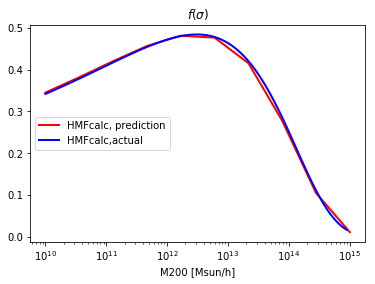

In [17]:
Mhalo = np.logspace(10, 15, 10)
plt.plot(Mhalo, f_PS(Mhalo), 
         linewidth=2.0, 
         color="r", 
         label='HMFcalc, prediction')
plt.plot(mV_data['M200, M/h'], mV_data['f(sigma)'],
        linewidth=2.0,
        color='b',
        label='HMFcalc,actual')
#plt.axhline(y=1.00, linewidth=0.5, hold=None)
plt.xlabel('M200 [Msun/h]')
plt.legend(loc='center left')
#plt.ylabel('Ratio')
plt.title('$f(\sigma)$')
plt.semilogx()
plt.show()

In [18]:
def dlogsigma_dlogM(M, Pk = kV_data):
    ans = 0
    k0 = Pk['k, h/Mpc'].min()
    R = (3*M/(4*np.pi*barrho))**(1./3.)
    for i, item in Pk.iterrows():
        k = item['k, h/Mpc']
        P = item['P(k), (Mpc/h)^3']
        
        x = k*R
        f1 = np.sin(x)-x*np.cos(x)
        f2 = np.sin(x)*(1-3/x**2)+3*np.cos(x)/x
        dW2_dM = f1*f2
        dk = k - k0
        dans = dW2_dM*(P/k**2)*dk
        ans += dans
        k0 = k
        #print(k, P, dans, ans)
    ans = ans*(3/(2*sigma2th(M, Pk)*np.pi**2*R**4))
    return np.abs(ans)

In [19]:
dlogsigma_dlogM(10**11)

0.1215275527062578

In [20]:
def dn_dlogM(M, Pk = kV_data, delta_c = 1.686):
    ans = (rho_0/M)*f_PS(M, kV_data, delta_c)*dlogsigma_dlogM(M, Pk = kV_data)
    return ans

In [21]:
dn_dlogM(10**15)

2.1342066964072871e-07

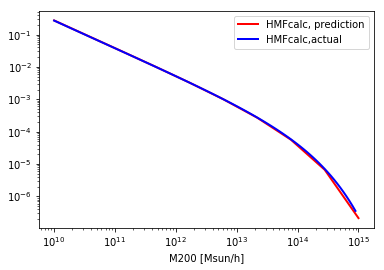

In [22]:
Mhalo = np.logspace(10, 15, 10)
plt.plot(Mhalo, dn_dlogM(Mhalo), 
         linewidth=2.0, 
         color="r", 
         label='HMFcalc, prediction')
plt.plot(mV_data['M200, M/h'], mV_data['dn/dlnm, h^3/Mpc^3'],
        linewidth=2.0,
        color='b',
        label='HMFcalc,actual')
#plt.axhline(y=1.00, linewidth=0.5, hold=None)
plt.xlabel('M200 [Msun/h]')
plt.legend(loc='upper right')
#plt.ylabel('Ratio')
#plt.title('$\frac{dn}{d\log M}$')
plt.semilogx()
plt.semilogy()
plt.show()

So, as we see, predicted halo mass function (red) almost coincides with calculation made by HMFcalc website 

2do: understand how good local Python version of the HMFcalc works (import hmf etc.)